# Document Ranking and Retrieval Techniques

This notebook demonstrates several techniques in ranked retrieval, scoring documents, and similarity measures in Information Retrieval (IR). We will cover the following topics:

- **Bag-of-Words Model**
- **Jaccard Coefficient**
- **Vector Space Scoring (TF-IDF)**
- **Ranked Retrieval**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from collections import Counter

### **Sample text documents for demonstration**

In [ ]:
# Sample text documents for demonstration
documents = [
    "Data Mining involves discovering patterns in large datasets to extract useful knowledge.",
    "Data Science is a multidisciplinary field that uses scientific methods to extract knowledge from structured and unstructured data.",
    "Machine Learning is a subset of Artificial Intelligence that enables systems to learn from data and improve without explicit programming.",
    "Artificial Intelligence refers to the simulation of human intelligence in machines that are programmed to think and learn."
]


### **Increse similarity between documents**

In [2]:
# Increse similarity between documents
documents = [
    "Data Mining involves discovering patterns in large datasets, applying scientific methods to extract useful knowledge and insights from both structured and unstructured data.",
    "Data Science is a multidisciplinary field that uses scientific methods, algorithms, and systems to extract knowledge and insights from both structured and unstructured data, similar to Data Mining.",
    "Machine Learning, a subset of Artificial Intelligence, uses algorithms and statistical models to learn from data and improve predictions or decisions without explicit programming, closely related to Data Mining and Data Science.",
    "Artificial Intelligence encompasses systems that simulate human intelligence, including machine learning algorithms that learn from data to improve performance, making it closely related to Data Mining, Data Science, and Machine Learning."
]


## Bag-of-Words Model

The **Bag-of-Words (BoW)** model is a simple representation of text data in which text is represented as a collection of words with their frequency counts. In this section, we will convert a set of documents into a matrix of token counts using the `CountVectorizer` class from `sklearn`.

In [3]:
# Bag-of-Words Model: Convert documents to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Display the array and feature names (words)
X.toarray(), vectorizer.get_feature_names_out()

(array([[0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
         0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
        [1, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
         1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0],
        [1, 3, 0, 1, 0, 1, 3, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
         0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1],
        [1, 1, 0, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
         0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
         1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0]]),
 array(['algorithms', 'and', 'applying', 'artificial', 'both', 'closely',
        'data', 'datasets', 'decisions', 'discovering', 'encompasses',
        'explicit', 'extract', 'field', 'from', 'human', 'improve', 'in',
       

## Jaccard Coefficient

The **Jaccard Coefficient** is a similarity measure used to compare the similarity and diversity of sample sets. It is defined as the size of the intersection of two sets divided by the size of the union of the sets. In this section, we will compute the Jaccard similarity between two sample documents.

In [4]:
# Jaccard Coefficient: Calculate similarity between two documents
doc1 = "Data Mining involves discovering patterns in large datasets to extract useful knowledge."
doc2 = "Machine Learning is a subset of Artificial Intelligence that enables systems to learn from data and improve without explicit programming."

# Convert text to sets of words
set_doc1 = set(doc1.split())
set_doc2 = set(doc2.split())

# Calculate Jaccard similarity
intersection = len(set_doc1.intersection(set_doc2))
union = len(set_doc1.union(set_doc2))
jaccard_sim = intersection / union
print(f"Jaccard Similarity between doc1 and doc2: {jaccard_sim}")

Jaccard Similarity between doc1 and doc2: 0.03225806451612903


## Vector Space Scoring (TF-IDF)

In **Vector Space Scoring**, we represent documents as vectors in a multi-dimensional space, and the similarity between documents is computed based on these vectors. **TF-IDF (Term Frequency - Inverse Document Frequency)** is a widely used scoring method to weigh the importance of terms in documents. In this section, we will compute the TF-IDF scores for the documents and calculate the cosine similarity between them.

In [5]:
# Vector Space Scoring: Use TF-IDF to calculate term importance
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(documents)

# Display the TF-IDF matrix and feature names (terms)
X_tfidf.toarray(), tfidf_vectorizer.get_feature_names_out()

(array([[0.        , 0.26118005, 0.25024845, 0.        , 0.19729876,
         0.        , 0.26118005, 0.25024845, 0.        , 0.25024845,
         0.        , 0.        , 0.19729876, 0.        , 0.13059002,
         0.        , 0.        , 0.25024845, 0.        , 0.19729876,
         0.        , 0.25024845, 0.        , 0.        , 0.19729876,
         0.25024845, 0.        , 0.        , 0.        , 0.        ,
         0.19729876, 0.13059002, 0.        , 0.        , 0.        ,
         0.        , 0.25024845, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.19729876, 0.        , 0.        ,
         0.        , 0.19729876, 0.        , 0.        , 0.        ,
         0.13059002, 0.19729876, 0.25024845, 0.        , 0.        ],
        [0.1496662 , 0.36708578, 0.        , 0.        , 0.18486753,
         0.        , 0.36708578, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.18486753, 0.23448103, 0.12236193,
         0.        , 0.        , 

### Cosine Similarity Matrix

The **Cosine Similarity** metric computes the cosine of the angle between two vectors, which can be used to determine the similarity between documents based on their TF-IDF representations.

In [6]:
# Displaying the similarity matrix based on cosine similarity for vector space scoring
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X_tfidf)
print("Cosine Similarity Matrix (Vector Space Scoring):\n", cosine_sim)

Cosine Similarity Matrix (Vector Space Scoring):
 [[1.         0.54746103 0.2276284  0.16085151]
 [0.54746103 1.         0.39024382 0.34966208]
 [0.2276284  0.39024382 1.         0.51551088]
 [0.16085151 0.34966208 0.51551088 1.        ]]


## Ranked Retrieval

**Ranked Retrieval** ranks documents based on their relevance to a given query. This can be done using cosine similarity between the query vector and document vectors. In this section, we will rank the documents based on their similarity to a query using the TF-IDF representation.

In [10]:
# Ranked Retrieval: Rank documents based on query
query = "Artificial Intelligence"
query_vec = tfidf_vectorizer.transform([query])

# Calculate similarity between query and documents
query_sim = cosine_similarity(query_vec, X_tfidf)
print("Query Similarities: ", query_sim)

# Ranking the documents based on similarity to the query
ranked_docs = np.argsort(query_sim[0])[::-1]
print("Ranked Documents: ", ranked_docs)

Query Similarities:  [[0.         0.         0.23276936 0.32896864]]
Ranked Documents:  [3 2 1 0]


### Visualizing Ranked Retrieval

Now we will visualize the similarity scores between the query and documents using a bar plot. This helps to understand how documents are ranked based on the query.

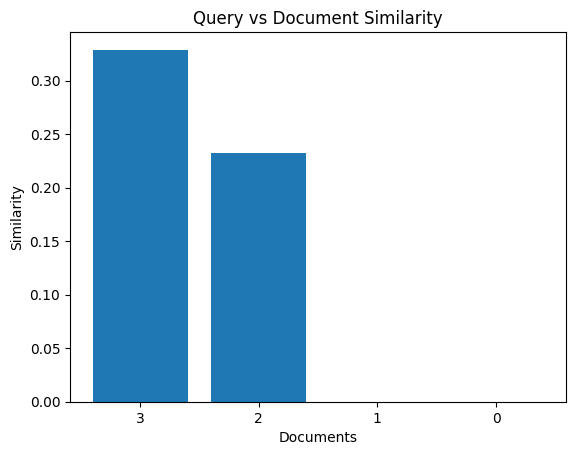

In [11]:
# Visualizing ranked retrieval results
plt.bar(range(len(ranked_docs)), query_sim[0][ranked_docs])
plt.xticks(range(len(ranked_docs)), ranked_docs)
plt.title('Query vs Document Similarity')
plt.xlabel('Documents')
plt.ylabel('Similarity')
plt.show()